# Task 2: Model Baseline and Data preparation

**Course:** Introduction to Data Science
**Lecturer:** Prof. Dr. Hendrik Meth

**Group 2:**
- Linus Breitenberger
- Tristan Ruhm
- Prarichut Poachanuan
- Anushka Irphale
- Patryk Gadziosmki

<div style="width:100%;height:30px;background-color:#E31134"></div>

## 0. Importing Requirements

In [24]:
# importing libraries
import pandas as pd
from sklearn import linear_model
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_absolute_error
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import PowerTransformer

## 1. Baseline linear regression model

In [25]:
# Loading the train and test data
train_df = pd.read_csv('../data/BikeRentalDaily_train.csv', delimiter=';')
test_df = pd.read_csv('../data/BikeRentalDaily_test.csv', delimiter=';')

### 1.1. Minimal Preprocessing

In [26]:
# Replacing all MissingValues with the most frequent values (don't make any sense, just for the working code)
imp_most_freq = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

train_df[:] = imp_most_freq.fit_transform(train_df)
test_df[:] = imp_most_freq.fit_transform(test_df)

In [27]:
# 'dteday' is not neccessary and breaks the code

train_df = train_df.drop('dteday', axis=1)
test_df = test_df.drop('dteday', axis=1)

### 1.2. Features/Label - Train/Test Split

In [28]:
# Splitting the train data into features and labels
train_features = train_df.iloc[:, :13]
train_labels = train_df.iloc[:, -1:]

# Splitting the test data into features and labels
test_features = test_df.iloc[:, :13]
test_labels = test_df.iloc[:, -1:]

In [29]:
# Check the split

# train_features
# train_labels
# test_features
# test_labels

### 1.3. Linear Regresion

In [30]:
# Model building

# We use linear regression, which is a supervised learning technique 
# with usage of labeled training data.
baseline_model = linear_model.LinearRegression()

baseline_model.fit(train_features, train_labels)

print(baseline_model.coef_)

[[ 1.24294882e+00  3.15719720e+02  1.99436579e+03 -3.54038301e+00
  -1.04678985e+03  1.82091578e+02 -4.71749309e+02 -7.48293456e+02
  -1.55008874e+01  7.94676335e+03 -7.04580755e+00 -6.30206852e+02
   9.13325512e-01]]


In [31]:
# Predict all test examples
baseline_pred = baseline_model.predict(test_features)
baseline_pred

array([[3406.9932736 ],
       [5089.67118593],
       [6893.58964078],
       [2381.29972783],
       [3495.756797  ],
       [ 696.39473747],
       [7629.06916376],
       [5843.83408871],
       [6781.57592485],
       [5900.84318077],
       [5367.8802674 ],
       [7521.66103429],
       [3392.46884844],
       [8149.93997078],
       [6684.35830847],
       [7905.54699563],
       [7412.91704975],
       [2419.05241288],
       [5465.43898259],
       [7696.61069886],
       [7510.5236049 ],
       [4989.11532123],
       [4176.96843099],
       [1240.87449579],
       [6273.7230086 ],
       [5420.55149342],
       [5942.6946315 ],
       [4730.3594732 ],
       [7547.89727355],
       [5307.62372381],
       [6138.19940021],
       [7362.78098889],
       [7256.54392756],
       [5573.02496653],
       [1283.71452962],
       [5776.50021622],
       [2670.1314791 ],
       [1354.34383982],
       [2787.95457997],
       [5331.39070204],
       [5319.01750342],
       [1312.922

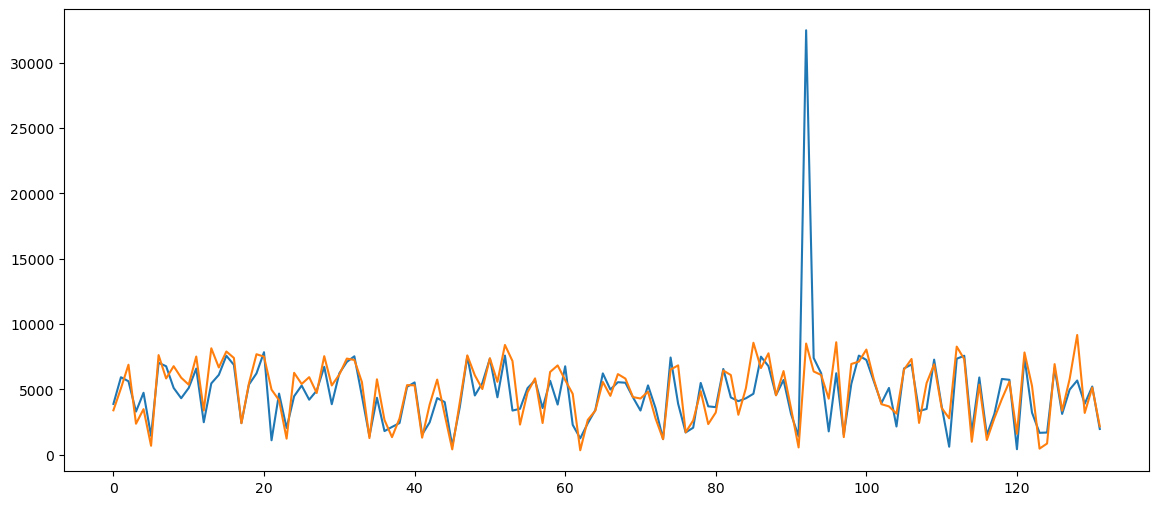

In [32]:
# Visualize the output
plt.figure(figsize=(14,6))
plt.plot(test_labels)
plt.plot(baseline_pred)

In [33]:
print(f"Predict label for following example:\n{test_features.iloc[0,:]}")

#Predict a single value
predicted_value = baseline_model.predict([test_features.iloc[0,:]])[0]

print("\nPredicted label: ",predicted_value)
print("Actual label:", test_labels.iloc[0])
print("Deviation predicted from actual value: ",predicted_value - test_labels.iloc[0])

Predict label for following example:
instant       299.000000
season          4.000000
yr              0.000000
mnth           10.000000
holiday         0.000000
weekday         3.000000
workingday      1.000000
weathersit      2.000000
temp           19.366700
atemp           0.472846
hum           108.062550
windspeed       0.148642
leaflets      605.000000
Name: 0, dtype: float64

Predicted label:  [3406.9932736]
Actual label: cnt    3894
Name: 0, dtype: int64
Deviation predicted from actual value:  cnt   -487.006726
Name: 0, dtype: float64


c:\Users\ruhmt\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [34]:
print(round(baseline_pred[:10] - test_labels.iloc[0:10])*100000, 2)

           cnt
0  -48700000.0
1  -84600000.0
2  126500000.0
3  -92900000.0
4 -125200000.0
5  -75400000.0
6   58900000.0
7  -93400000.0
8  166300000.0
9  156900000.0 2


### 1.4. Evaluate Baseline model

In [35]:
# Evaluate model

#Return Mean Absolute Error -> Loss: The beste Value is 0.0
mae = mean_absolute_error(test_labels, baseline_pred)
print('MAE: %.3f' % mae)

#Return the coefficient of determination R^2 of the prediction -> Score: best possible value is 1.0
print("R^2 value of the model: ",baseline_model.score(test_features, test_labels))

MAE: 1054.862
R^2 value of the model:  0.40019653709042435


## 2. Preprocessing

In [36]:
# Loading the train and test data
train_df = pd.read_csv('../data/BikeRentalDaily_train.csv', delimiter=';')
test_df = pd.read_csv('../data/BikeRentalDaily_test.csv', delimiter=';')

### 2.1. Train Data Preprocessing

In [37]:
#hum has to many outliers
#windspeed has only 4 outliers, can be handled via imputation
print("Hum Outliers: ", len(train_df[train_df["hum"] > 100])) # drop / don't use later
print("Windspeed Outliers: ", len(train_df[train_df["windspeed"] < 0]))

Hum Outliers:  229
Windspeed Outliers:  4


In [38]:
#replacing outliers of windspeed with the median 
for i in train_df['windspeed']:
    if i < 0:
        train_df['windspeed'] = train_df['windspeed'].replace(i, train_df['windspeed'].median())

In [39]:
#replace missing values of season via dteday
for i in train_df['season']:
    if np.isnan(i):
        for j in train_df['dteday']:
            if j > '20.12.' and  j < '21.03.':
                train_df['season'] = train_df['season'].replace(i, 1)
            if j > '20.03.' and  j <'21.06.':
                train_df['season'] = train_df['season'].replace(i, 2)
            if j > '20.06.' and  j <'21.09.':
                train_df['season'] = train_df['season'].replace(i, 3)
            if j > '20.09.' and  j <'21.12.':
                train_df['season'] = train_df['season'].replace(i, 4)

In [40]:
train_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,leaflets,price reduction,casual,registered,cnt
0,154,03.06.2011,2.0,0,6,0,5,1,1,24.8000,0.587133,53.12505,0.253121,991,0,898,4414,5312
1,685,15.11.2012,4.0,1,11,0,4,1,2,12.8667,0.324492,93.06255,0.152987,601,0,320,5125,5445
2,368,03.01.2012,1.0,1,1,0,2,1,1,6.0000,0.126275,66.18750,0.365671,549,0,89,2147,2236
3,472,16.04.2012,2.0,1,4,1,1,0,1,26.5667,0.614925,84.25005,0.284829,740,0,1198,5172,6370
4,442,17.03.2012,1.0,1,3,0,-1,0,2,20.5667,0.505046,113.37495,0.110704,773,1,3155,4681,7836


In [41]:
#replace the missing values via dteday, new order
train_df['weekday'] = pd.to_datetime(train_df['dteday'], format="%d.%M.%Y").dt.dayofweek
train_df['weekday']

0      0
1      6
2      1
3      0
4      1
      ..
595    2
596    5
597    3
598    2
599    2
Name: weekday, Length: 600, dtype: int64

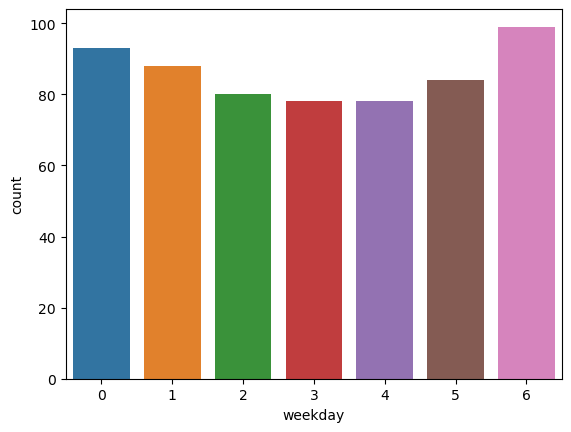

In [42]:
sns.countplot(x='weekday', data=train_df)
plt.show()

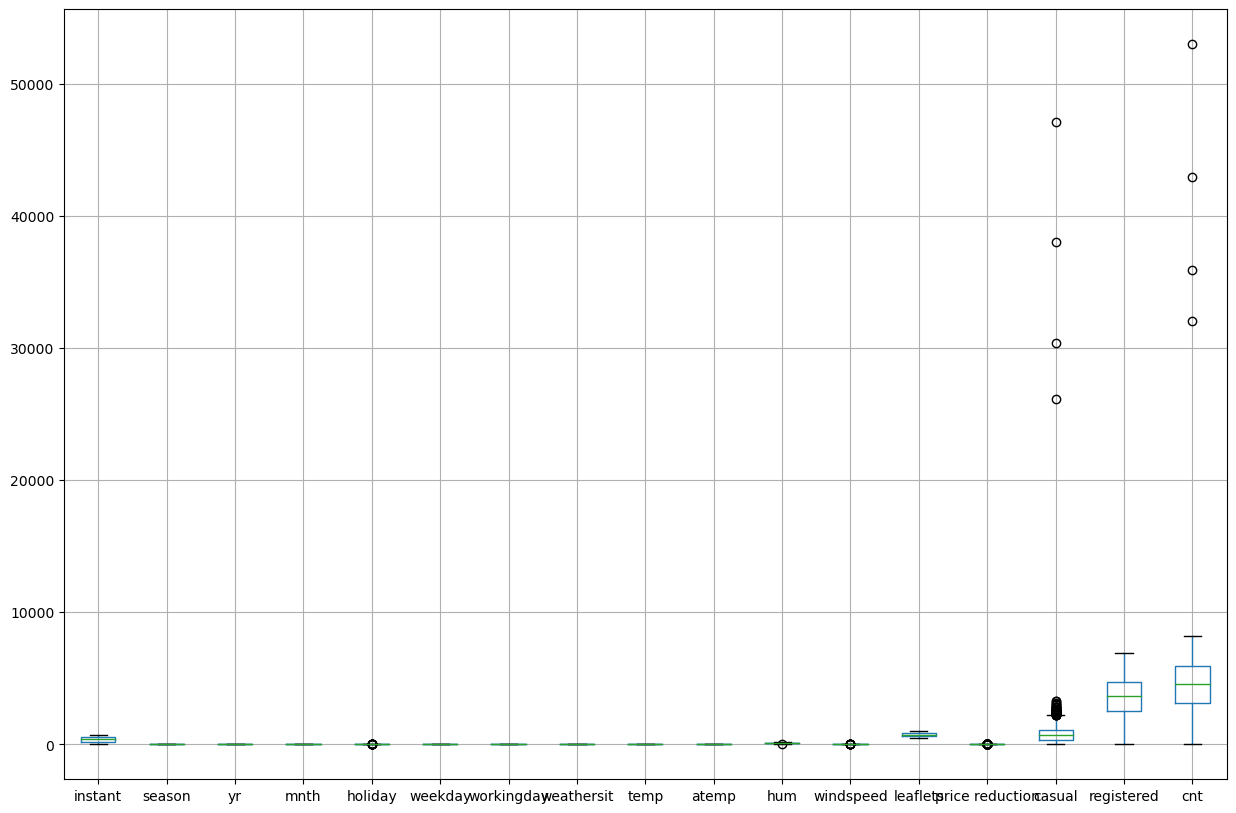

In [43]:
boxplot = train_df.boxplot(figsize=(15, 10))
plt.show()

In [44]:
index_names = train_df[ train_df['cnt'] > 20000 ].index 
# drop these row indexes 
# from dataFrame 
train_df = train_df.drop(index_names) 

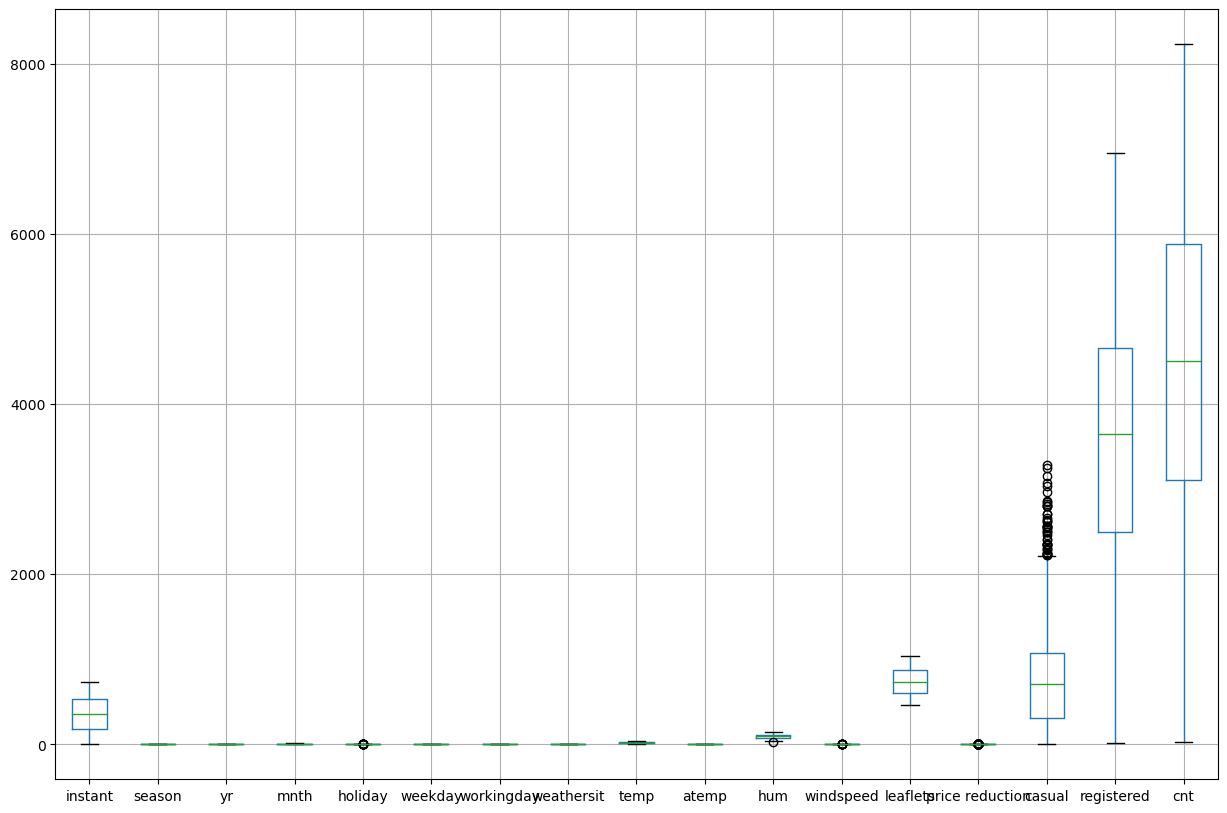

In [45]:
boxplot = train_df.boxplot(figsize=(15, 10))
plt.show()

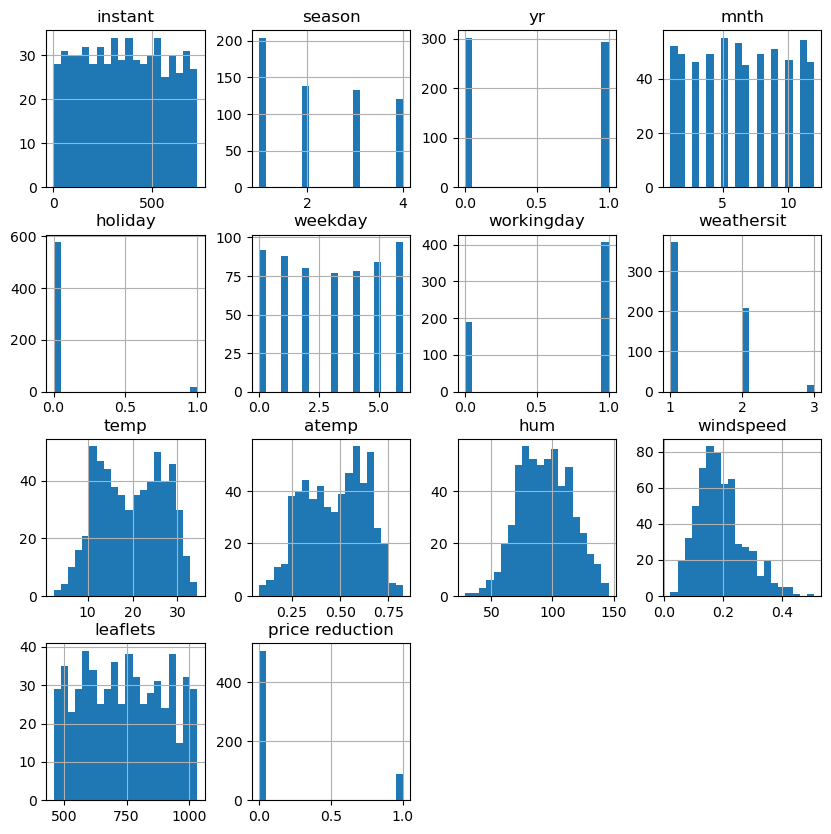

In [46]:
# histogram plot
hist = train_df.iloc[:, :15].hist(bins=20,figsize=(10, 10))
# windspeed seems to be skewed, so we will normalize this feature

In [47]:
pt = PowerTransformer(standardize=False)
trans_temp= pt.fit_transform(np.array(train_df['windspeed'].array.reshape(-1, 1)))


train_df['windspeed']=trans_temp
hist = train_df['windspeed'].hist(bins=20,figsize=(10, 10))

AttributeError: module 'numpy' has no attribute 'warnings'

In [ ]:
pt = PowerTransformer(standardize=False)
trans_temp= pt.fit_transform(np.array(train_df['windspeed'].values.reshape(-1, 1)))


train_df['windspeed']=trans_temp
hist = train_df['windspeed'].hist(bins=20,figsize=(10, 10))

AttributeError: module 'numpy' has no attribute 'warnings'

In [ ]:
train_df

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,leaflets,price reduction,casual,registered,cnt
0,154,03.06.2011,2.0,0,6,0,0,1,1,24.8000,0.587133,53.12505,0.253121,991,0,898,4414,5312
1,685,15.11.2012,4.0,1,11,0,6,1,2,12.8667,0.324492,93.06255,0.152987,601,0,320,5125,5445
2,368,03.01.2012,1.0,1,1,0,1,1,1,6.0000,0.126275,66.18750,0.365671,549,0,89,2147,2236
3,472,16.04.2012,2.0,1,4,1,0,0,1,26.5667,0.614925,84.25005,0.284829,740,0,1198,5172,6370
4,442,17.03.2012,1.0,1,3,0,1,0,2,20.5667,0.505046,113.37495,0.110704,773,1,3155,4681,7836
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,78,19.03.2011,1.0,0,3,0,2,0,1,18.9000,0.466525,56.87505,0.368167,1022,1,1424,1693,3117
596,81,22.03.2011,1.0,0,3,0,5,1,1,17.6667,0.440642,93.68745,0.225750,551,0,460,2243,2703
597,377,12.01.2012,1.0,1,1,0,3,1,2,15.3000,0.381938,120.43755,0.180967,520,0,269,3828,4097
598,299,26.10.2011,4.0,0,10,0,2,1,2,19.3667,0.472846,108.06255,0.148642,605,0,404,3490,3894


### 2.2. Test Data Preprocessing

In [ ]:
#Again, alot of hum values are over 100, so we have some outliers here, so we delete it also
print(len(test_df[test_df["hum"] > 100]))

45


In [ ]:
for i in test_df['season']:
    if np.isnan(i):
        for j in test_df['dteday']:
            if j > '20.12.' and  j < '21.03.':
                test_df['season'] = test_df['season'].replace(i, 1)
            if j > '20.03.' and  j <'21.06.':
                test_df['season'] = test_df['season'].replace(i, 2)
            if j > '20.06.' and  j <'21.09.':
                test_df['season'] = test_df['season'].replace(i, 3)
            if j > '20.09.' and  j <'21.12.':
                test_df['season'] = test_df['season'].replace(i, 4)

test_df['weekday'] = pd.to_datetime(test_df['dteday'], format="%d.%M.%Y").dt.dayofweek

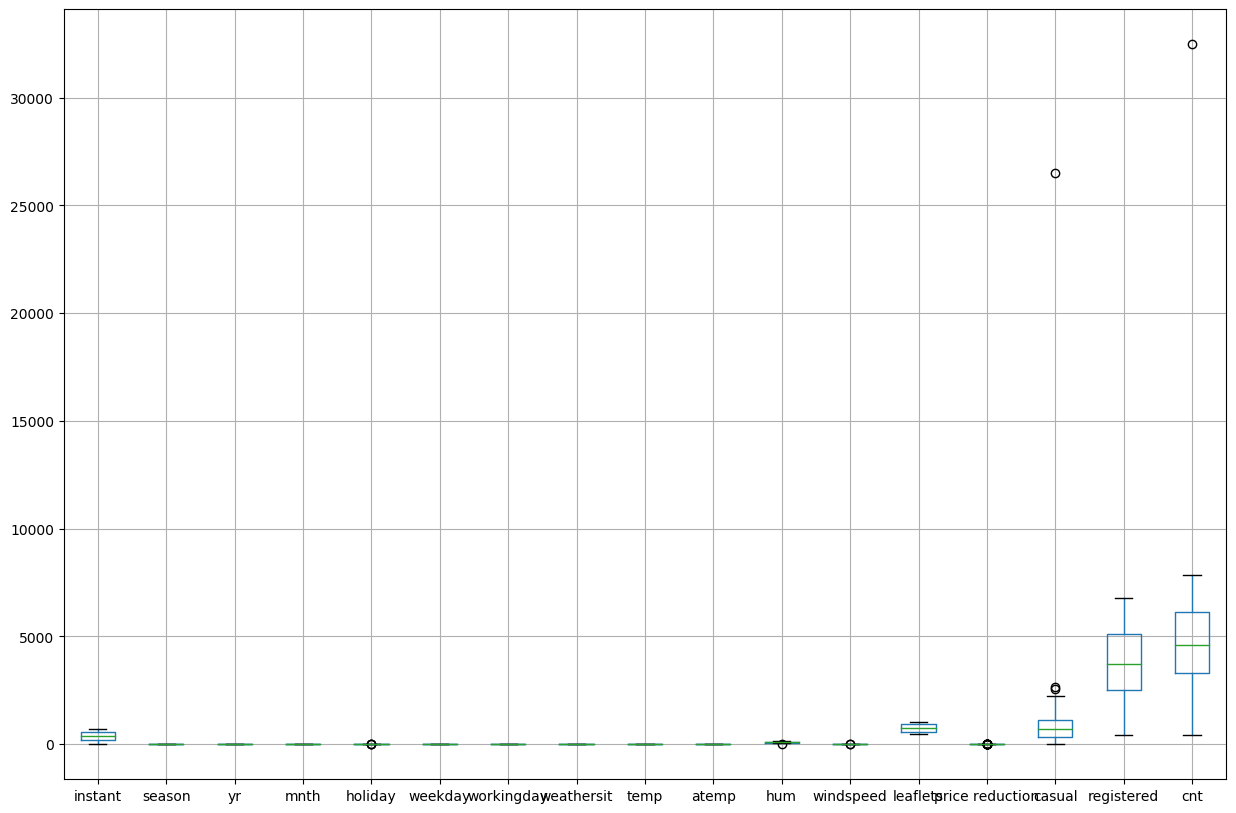

In [ ]:
boxplot = test_df.boxplot(figsize=(15, 10))
plt.show()

In [ ]:
feature_test_df = test_df.iloc[:, :15]
feature_test_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,leaflets,price reduction
0,299,26.10.2011,4.0,0,10,0,2,1,2,19.3667,0.472846,108.06255,0.148642,605,0
1,458,02.04.2012,2.0,1,4,0,0,1,1,17.3565,0.427513,75.65220,0.312139,518,0
2,687,17.11.2012,4.0,1,11,0,1,0,1,13.0000,0.326383,81.81255,0.179729,766,0
3,346,12.12.2011,4.0,0,12,0,2,1,1,9.5333,0.270196,NaN,0.063450,739,0
4,291,18.10.2011,4.0,0,10,0,1,1,2,21.3000,0.522721,105.25005,0.110087,463,0


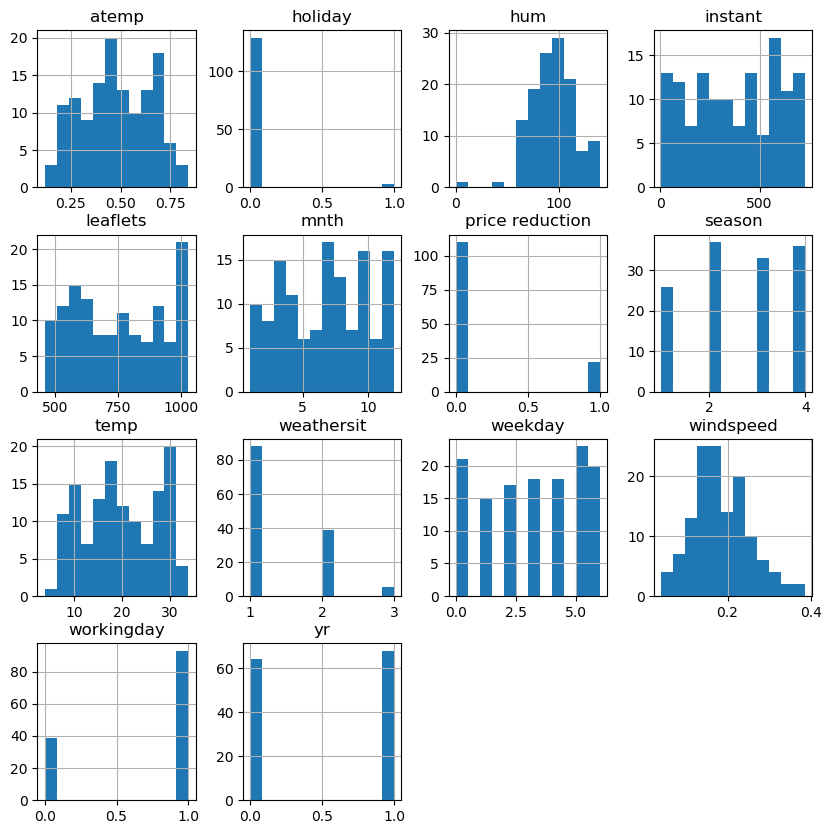

In [ ]:
hist = feature_test_df.hist(bins=12,figsize=(10, 10))

In [ ]:
trans_windspeed= pt.fit_transform(np.array(feature_test_df['windspeed'].values.reshape(-1, 1)))

feature_test_df['windspeed ptransformed']=trans_windspeed
test_df['windspeed'] = feature_test_df['windspeed ptransformed']
hist = test_df['windspeed'].hist(bins=20,figsize=(10, 10))

NameError: name 'feature_test_df' is not defined

In [ ]:
test_df

## 3. Feature Selection

In [ ]:
# 'instant' and 'dteday' are not neccessary
train_df = train_df.drop('dteday', axis=1).drop('instant', axis=1).drop('hum', axis=1)
test_df = test_df.drop('dteday', axis=1).drop('instant', axis=1).drop('hum', axis=1)

In [ ]:
#calculate correlations between all features of your data frame (see Exploration lab)
train_corr = train_df.corr()
print(train_corr)

# Displaying correlations as a heatmap / correlation matrix 
train_corr.style.background_gradient(cmap='coolwarm')

In [ ]:
#calculate correlations of features to label
train_df_corr_label = train_df.iloc[:, :].corr()["cnt"]
train_df_corr_label

In [ ]:
# All the preprocessed features
train_corr_high = train_df

# The nine features with the highest correlation with count
train_corr_high = train_df[train_df_corr_label.abs().sort_values(ascending=False).index[:12]]

# The four features with the highest correlation with count -------> (favorit)
# train_corr_high = train_df[train_df_corr_label.abs().sort_values(ascending=False).index[:7]]

train_corr_high

## 4. New Linear Regression Model

### 4.1. Split

In [ ]:
# Splitting the train data into features and labels
train_features = train_corr_high.iloc[:, 3:]
train_labels = train_corr_high.iloc[:, :1]

# Splitting the test data into features and labels
test_features = test_df.loc[:, ['atemp', 'temp', 'yr', 'season', 'weathersit', 'windspeed', 'mnth', 'holiday', 'weekday']]
test_labels = test_df.iloc[:, -1:]

# train_features
# train_labels
# test_features
# test_labels

### 4.2. Linear Regression

In [ ]:
# Model building

# We use linear regression, which is a supervised learning technique 
# with usage of labeled training data.
model = linear_model.LinearRegression()

model.fit(train_features, train_labels)

print(model.coef_)

In [ ]:
# Predict all test examples
pred = model.predict(test_features)
pred

### 4.3. Evaluation

In [ ]:
# Visualize the output
plt.figure(figsize=(14,6))
plt.plot(test_labels)
plt.plot(pred)

In [ ]:
print(f"Predict label for following example:\n{test_features.iloc[0,:]}")

#Predict a single value
predicted_value = model.predict([test_features.iloc[0,:]])[0]

print("\nPredicted label: ",predicted_value)
print("Actual label:", test_labels.iloc[0])
print("Deviation predicted from actual value: ", predicted_value - test_labels.iloc[0])

In [ ]:
print(round(pred[:10] - test_labels.iloc[0:10])*100000, 2)

In [ ]:
# Evaluate model

#Return Mean Absolute Error -> Loss: The beste Value is 0.0
mae = mean_absolute_error(test_labels, pred)
print('MAE: %.3f' % mae)

#Return the coefficient of determination R^2 of the prediction -> Score: best possible value is 1.0
print("R^2 value of the model: ", model.score(test_features, test_labels))